Epoch 1/20


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2403   
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0107 
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 
Epoch 16/20
3

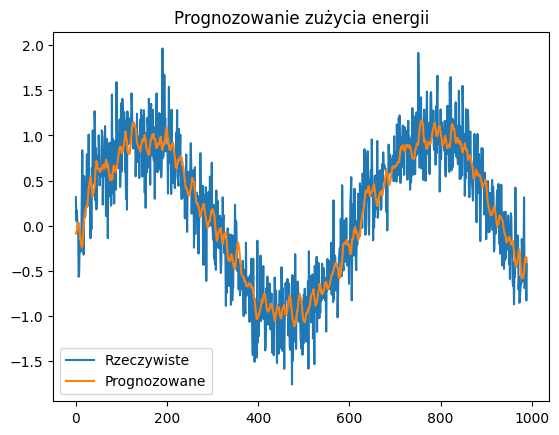

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def create_sequences(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)
    
def generate_energy_data(n_samples=1000):
    x = np.linspace(0, 10, n_samples)
    y = np.sin(x) + np.random.normal(0, 0.3, size=n_samples)
    return y.reshape(-1, 1)

data_energy = generate_energy_data()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_energy)

X, y = create_sequences(data_scaled, look_back=10)
X = X.reshape(X.shape[0], X.shape[1], 1)

model_energy = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

model_energy.compile(optimizer='adam', loss='mse')
model_energy.fit(X, y, epochs=20, batch_size=32)

predicted = model_energy.predict(X)
predicted = scaler.inverse_transform(predicted)

plt.plot(scaler.inverse_transform(y.reshape(-1, 1)), label="Rzeczywiste")
plt.plot(predicted, label="Prognozowane")
plt.legend()
plt.title("Prognozowanie zużycia energii")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def generate_sensor_data(n_samples=1000, timesteps=10):
    X = np.random.normal(0, 1, (n_samples, timesteps))
    y = np.zeros(n_samples)

    anomaly_indices = np.random.choice(n_samples, size=n_samples // 10, replace=False)
    X[anomaly_indices] += np.random.normal(5, 1, (len(anomaly_indices), timesteps))
    y[anomaly_indices] = 1

    return X.reshape((n_samples, timesteps, 1)), y

X_noise, y_noise = generate_sensor_data()
X_train, X_test, y_train, y_test = train_test_split(X_noise, y_noise, test_size=0.2)

model_noise = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(X_noise.shape[1], 1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_noise.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_noise.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model_noise.evaluate(X_test, y_test)
print(f"Dokładność wykrywania anomalii w hałasie: {accuracy:.2f}")

Epoch 1/10


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8334 - loss: 0.6676 - val_accuracy: 0.9700 - val_loss: 0.5320
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9870 - loss: 0.4749 - val_accuracy: 1.0000 - val_loss: 0.1547
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0821 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0023
Epo

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5190 - loss: 0.9240 - val_accuracy: 0.9750 - val_loss: 0.2142
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9696 - loss: 0.1994 - val_accuracy: 0.9975 - val_loss: 0.0475
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.0665 - val_accuracy: 1.0000 - val_loss: 0.0417
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss:

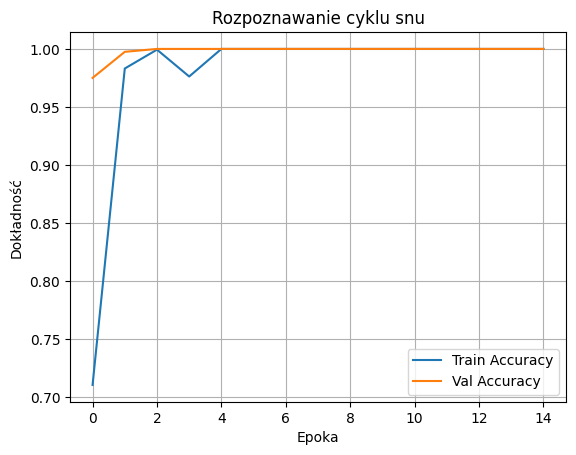

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 
Dokładność klasyfikacji cyklu snu: 1.00


In [5]:
def generate_sleep_data(n_samples=2000, timesteps=30):
    X, y = [], []
    
    for label in range(3):  # Fazy snu: 0 = lekki sen, 1 = głęboki sen, 2 = REM
        for _ in range(n_samples // 3):
            if label == 0:
                sequence = np.random.normal(0, 0.2, (timesteps,))
            elif label == 1:
                sequence = np.sin(np.linspace(0, 2*np.pi, timesteps)) + np.random.normal(0, 0.1, (timesteps,))
            else:
                sequence = np.sin(np.linspace(0, 4*np.pi, timesteps)) + np.random.normal(0, 0.15, (timesteps,))
            X.append(sequence)
            y.append(label)

    X = np.array(X).reshape(-1, timesteps, 1)
    y = tf.keras.utils.to_categorical(np.array(y), num_classes=3)
    
    return X, y

X_sleep, y_sleep = generate_sleep_data()
X_train, X_test, y_train, y_test = train_test_split(X_sleep, y_sleep, test_size=0.2)

model_sleep = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_sleep.shape[1], 1)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_sleep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sleep.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Rozpoznawanie cyklu snu')
plt.legend()
plt.grid()
plt.show()

loss, accuracy = model_sleep.evaluate(X_test, y_test)
print(f"Dokładność klasyfikacji cyklu snu: {accuracy:.2f}")